In [8]:
import os, numpy as np, pandas as pd
sys.path.append(os.path.abspath("../"))
from pathlib import Path

Path("../outputs/part1").mkdir(parents=True, exist_ok=True)

df = pd.read_csv("../data/measure1_smartphone_sens.csv")
df.columns = [c.strip() for c in df.columns]

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()
c = corr.copy()
np.fill_diagonal(c.values, np.nan)
top_pairs = (c.abs().stack().reset_index()
             .rename(columns={"level_0":"col_x","level_1":"col_y",0:"abs_corr"})
             .dropna().sort_values("abs_corr", ascending=False).head(10))
top_pairs


,col_x,col_y,abs_corr
17,AccelerationX,Y-AxisAngle(Roll),0.961808
82,Y-AxisAngle(Roll),AccelerationX,0.961808
74,X-AxisAngle(Pitch),AccelerationY,0.937681
25,AccelerationY,X-AxisAngle(Pitch),0.937681
67,Z-AxisAgle(Azimuth),MagneticFieldX,0.803140
42,MagneticFieldX,Z-AxisAgle(Azimuth),0.803140
1,timestamp,AccelerationY,0.563571
18,AccelerationY,timestamp,0.563571
4,timestamp,MagneticFieldY,0.498453
45,MagneticFieldY,timestamp,0.498453


In [9]:
COL_X, COL_Y = "AccelerationX", "AccelerationY"  # change if another pair is cleaner
X2d = df[[COL_X, COL_Y]].dropna().to_numpy()
X2d.shape


(18354, 2)

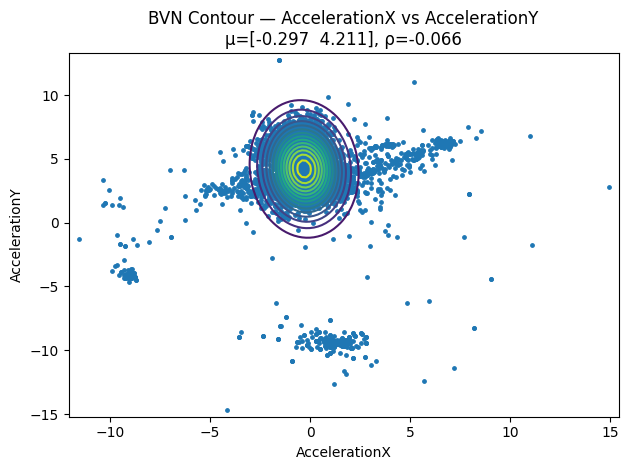

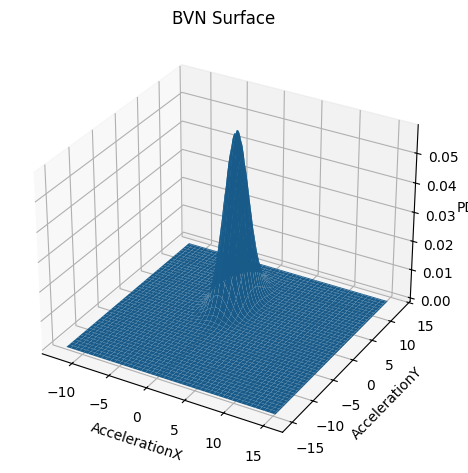

(array([-0.29674594,  4.21101885]),
 array([[ 1.37444102, -0.17871869],
        [-0.17871869,  5.4111724 ]]),
 np.float64(-0.06553317855654682))

In [10]:
from src.bvn import compute_mu_sigma, bivariate_normal_pdf, make_grid
from src.bvn import plot_contour_and_save, plot_surface3d_and_save
import numpy as np

mu, Sigma, rho = compute_mu_sigma(X2d)
G1, G2, P = make_grid(X2d, pad=0.5, n=140)
Z = np.array([bivariate_normal_pdf(p, mu, Sigma) for p in P]).reshape(G1.shape)

plot_contour_and_save(G1, G2, Z, X2d, COL_X, COL_Y, mu, rho, "../outputs/part1/contour.png")
plot_surface3d_and_save(G1, G2, Z, COL_X, COL_Y, "../outputs/part1/surface3d.png")

mu, Sigma, rho